In [53]:
import sys
import xml.dom.minidom as dom 
import string
from xml.dom import minidom
from xml.dom.minidom import parse
import os

from pprint import pprint # to print element properties

#Read XML file
#network_name = "janos-us.xml"


#Create a Node class
class Node:
    def __init__(self,uid,x,y):
        self.uid=uid
        self.x=x
        self.y=y
        self.linklist=[]
        self.demandlist=[]

#Create a Link class
class Link:
    def __init__(self,uid,source,target,capacity,cost):
        self.uid=uid
        self.source=source
        self.target=target
        self.capacity=capacity
        self.cost = cost

#Create a Demand class
class Demand:
    def __init__(self,uid,source,destination,demandValue):
        self.uid=uid
        self.source=source
        self.destination=destination
        self.demandValue=demandValue




In [54]:
#Read Nodes from XML
def read_nodes(nodelist) -> dict:
    nodes = {} #creates empty nodes dictionary
    count_nodes = 0
    for node in nodelist :
        cur_node = {} #create temp node dictionary
        if node.hasAttribute("id"):
            Nodeid = node.getAttribute("id")
        x_cor = node.getElementsByTagName('x') [0] #Get dom object from XML
        x_cor = float(x_cor.childNodes[0].data) #Convert object to float
        y_cor = node.getElementsByTagName('y') [0] #Get dom object from XML
        y_cor = float(y_cor.childNodes[0].data) #Convert object to float
        cur_node = { 'id':Nodeid, 'x_cor':x_cor, 'y_cor':y_cor} #save into temp dict
        count_nodes +=1 #move to next node
        nodes[count_nodes] = cur_node #insert temp dict into nodes dict
    #print(nodes.keys()) #Print Level1 Dictionary Indexs
    #print(nodes) #Print Level1&2 Dictionary Values
    return nodes

In [55]:
#Read Links from XML
def read_links(linklist) -> dict:
    links = {}
    count_links = 0
    for link in linklist :
        cur_link = {} #create temp link dictionary
        if link.hasAttribute("id"):
            Linkid = link.getAttribute("id")
        Source = (link.getElementsByTagName('source') [0]).childNodes[0].data #Get dom object from XML
        Destination = (link.getElementsByTagName('target') [0]).childNodes[0].data
        Capacity = float((link.getElementsByTagName('capacity') [0]).childNodes[0].data)
        Cost = float((link.getElementsByTagName('cost') [0]).childNodes[0].data)
        cur_link = { 'source':Source, 'destination':Destination, 'capacity':Capacity, 'cost':Cost} #save into temp dict
        count_links +=1
        links[count_links] = cur_link
    #print(links.keys())
    #print(links)
    return links

In [56]:
#Read Demands from XML
def read_demands(demandlist)-> dict:
    demands = {}
    count_demands = 0
    for demand in demandlist :
        cur_demand = {} #create temp link dictionary
        if demand.hasAttribute("id"):
            Demandid = demand.getAttribute("id")
        Source = (demand.getElementsByTagName('source') [0]).childNodes[0].data #Get dom object from XML
        Destination = (demand.getElementsByTagName('target') [0]).childNodes[0].data
        Demandval = float((demand.getElementsByTagName('demandValue') [0]).childNodes[0].data)
        cur_demand = { 'source':Source, 'destination':Destination, 'demandValue':Demandval} #save into temp dict
        count_demands +=1
        demands[count_demands] = cur_demand
    return demands


In [57]:
#Function that will be called to read networks from other files
def read_network(filename: str) -> dict:
    Read_Data = minidom.parse(filename)
    nodelist = Read_Data.getElementsByTagName("node")
    nodes = read_nodes(nodelist)

    linklist = Read_Data.getElementsByTagName("link")
    links = read_links(linklist)

    demandlist = Read_Data.getElementsByTagName("demand")
    demands = read_demands(demandlist)

    c = nodes, links, demands

    return c

In [58]:
#Print Read File

#Testing Nodes
def print_test(network_name: str, nodes: dict, links: dict, demands: dict ):
    print('\n\nNetwork Name: ' + network_name)

    print('\n**** Nodes read: ******\n')
    for node in nodes:
        s = 'Node # \t' + str(node) + ': \t' + (nodes.get(node).get("id")).ljust(20) + '\tx: ' + str(nodes.get(node).get("x_cor")) + ', \ty: '+ str(nodes.get(node).get("y_cor")) 
        #s = 'Node # \t' + str(node) + ': \t' + nodes.get(node).get("id") + '\tx: ' + str(nodes.get(node).get("x_cor")) + ', \ty: '+ str(nodes.get(node).get("y_cor")) 
        print(s)

    print('\n**** Links read: ******\n')
    for link in links:
        s = 'Link # \t' + str(link) + ', From: ' + (links.get(link).get("source")).ljust(15) + ', To: '+ (links.get(link).get("destination")).ljust(15)+ ",\t Capacity: " + str(links.get(link).get("capacity")) + ", \tCost: " + str(links.get(link).get("cost"))
        print(s)

Network X Code goes here, now we convert it into a graph

['Seattle', 'SanFrancisco', 'LosAngeles', 'ElPaso', 'Houston', 'NewOrleans', 'Miami']
Graph with 26 nodes and 42 edges


/var/folders/6y/vllmdlcj6x5fd8zhcmbh_v4w0000gn/T/ipykernel_5406/2128643695.py:60: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


1.19 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


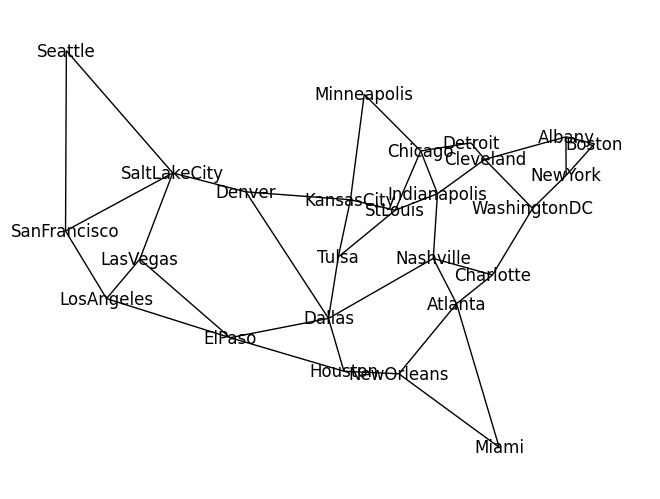

In [59]:


#Building a Network with Network

#1. Convert XML Network Dictionary into a networkx graph
#2. Create a 3 server, linked network and run shortest path
#3. Implement Random Placement Algorithm

import networkx as nx

import matplotlib.pyplot as plt

from ImportNetworkFromXML import *

G = nx.Graph()


options = ['abilene.xml' , 'janos-us.xml', 'brain.xml']

network_name = options[1]
from_xml = read_network(network_name)

nodes = from_xml[0]
links = from_xml[1]
demands = from_xml[2]

#Test the imported networks
#print_test(network_name,nodes,links,demands)



for node in nodes:
    node_id = nodes[node].get("id")
    x_cor = nodes[node].get("x_cor")
    y_cor = nodes[node].get("y_cor")
    G.add_node(node_id, pos=(x_cor, y_cor))


for link in links.keys():
    source = links[link].get("source")
    for source_node in nodes:
        if nodes[source_node].get('id') == source:
            break
    dest = links[link].get("destination")
    for dest_node in nodes:
        if nodes[dest_node].get('id') == dest:
            break
    capacity = links[link].get("capacity")
    cost = links[link].get("cost")
    G.add_edges_from([(source, dest, {'capacity': capacity, 'cost': cost})])


nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=0)
print(nx.dijkstra_path(G,'Seattle', 'Miami'))

# final all shortest path pairs
sp = dict(nx.all_pairs_shortest_path(G))
#print(sp)


#print network info
print(nx.info(G))

%timeit nx.closeness_centrality(G)


# Network statistics
There are many useful functions to calculate network stats for you.

## Global level stats
1. Density
2. Avg. shortest path length
3. Avg. clustering coefficient
4. Assortativity

In [60]:
#Print network stats
print('Density:', nx.density(G))

print('Avg. shortest path length:', nx.average_shortest_path_length(G))

print('Avg. clustering coefficient:', nx.average_clustering(G))

print('Assortativity', nx.degree_assortativity_coefficient(G))

Density: 0.12923076923076923
Avg. shortest path length: 3.3076923076923075
Avg. clustering coefficient: 0.30512820512820504
Assortativity -0.1073446327683659


In [61]:
import numpy as np
import pandas as pd

erdos_assortativity_list = list()
conf_assortativity_list = list()

n = G.number_of_nodes() # number of nodes
p = 2.*G.number_of_edges()/(n*n-1) # probability of edge creation
print (n)
print(p)

degree_dist = np.asarray(list(dict(G.degree()).values()))
degree_dist

for i in range(100): # randomly sample random graphs 100 times
    erdos_rg = nx.erdos_renyi_graph(n, p, seed=np.random.randint(10))
    conf_rg = nx.Graph(nx.configuration_model(degree_dist, seed=np.random.randint(10))) # convert `MultiGraph` to `Graph`
    # calculate assortativity
    erdos_assortativity_list.append(nx.degree_assortativity_coefficient(erdos_rg))
    conf_assortativity_list.append(nx.degree_assortativity_coefficient(conf_rg))

print('Erdos-Renyi assortativity:', np.mean(erdos_assortativity_list), np.std(erdos_assortativity_list, ddof=1))
print('Conf. model assortativity:', np.mean(conf_assortativity_list), np.std(conf_assortativity_list, ddof=1))
print('Real network value:', nx.degree_assortativity_coefficient(G))

#Now you see that there's a much higher tendency of the low degree nodes (mostly members) in ___karate club network___ to connect 
# with high degree nodes (mostly leaders). We can then interpret that there may be a core-periphery or leader-member structure. 
# (We cannot be sure about this from this very simple approach though!)

26
0.12444444444444444
Erdos-Renyi assortativity: -0.0379165614265861 0.18660436058112845
Conf. model assortativity: -0.039458151005205305 0.10566714746293274
Real network value: -0.1073446327683659


# Page Rank Algorithm
Ranking nodes based on various strategies is a common thing in measuring node importance. PageRank is one of the most successful one and has still been used in both the industry and academia. Usually, PageRank is applied in a directed network, where an edge has a direction. For example, webpage A has a link to webpage B but not the other way around. Therefore in the network of WWW, we only have A → B but NOT B → A.

## Reference:
Page, Lawrence and Brin, Sergey and Motwani, Rajeev and Winograd, Terry (1999) The PageRank Citation Ranking: Bringing Order to the Web. Technical Report. Stanford InfoLab.

## Build network
Network data from http://tuvalu.santafe.edu/~aaronc/datacode.htm

In [65]:
pr = nx.pagerank(G, alpha=0.85)

pr_df = pd.DataFrame([{'name': k, 'value': v} for k, v in pr.items()])
pr_df.head()
pr_df.sort_values('value', ascending=False).head(10)

,name,value
6,Dallas,0.054326
17,Cleveland,0.047761
4,SaltLakeCity,0.047580
23,Atlanta,0.046916
12,Chicago,0.046435
10,KansasCity,0.045498
5,ElPaso,0.045289
13,Indianapolis,0.044716
16,Nashville,0.044602
15,StLouis,0.044476


# Approximations and Heuristics
Approximations of graph properties and Heuristic methods for optimization.

# import
These functions can be accessed using networkx.approximation.function_name

They can be imported using from networkx.algorithms import approximation or from networkx.algorithms.approximation import function_name

# Treewidth
Functions for computing treewidth decomposition.

Treewidth of an undirected graph is a number associated with the graph. It can be defined as the size of the largest vertex set (bag) in a tree decomposition of the graph minus one.

Wikipedia: Treewidth

treewidth_min_degree(G): Returns a treewidth decomposition using the Minimum Degree heuristic.

In [66]:
from networkx.algorithms import approximation as algos
algos.treewidth_min_degree(G)

(4, <networkx.classes.graph.Graph at 0x11561a5c0>)